In [171]:
import numpy as np 
import seaborn as sns 
import csv 
import pandas as pd 
import matplotlib.pyplot as plt 
import zipfile 
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [123]:
df = pd.read_csv("hour.csv")


In [124]:
# Creating a deep copy of df for exploratory data analysis ,
#This way, you always have the pristine data for reference or further analysis if needed.
dfc=df.copy(deep=True)

dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [125]:
dfc2=df.copy(deep=True)


In [126]:
dfc.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [127]:
dfc= dfc.drop(columns = ['instant','dteday'])
dfc2= dfc2.drop(columns = ['instant','dteday'])


In [128]:
dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


In [129]:
#checking for missing values and duplicated
missing_values = dfc.isnull().sum()
duplicated = dfc.duplicated().sum()

In [130]:
dfc= dfc.drop_duplicates()
dfc2= dfc2.drop_duplicates()


In [131]:
dfc.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,0.502561,6.537435,11.547505,0.028774,3.003568,0.682742,1.425332,0.496993,0.475780,0.627216,0.190108,35.680267,153.803649,189.483916
std,1.106917,0.500008,3.438722,6.914438,0.167175,2.005744,0.465422,0.639377,0.192553,0.171849,0.192935,0.122343,49.306423,151.357913,181.387645
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [132]:
#rename the values of column and the columns name to clarify the meaning 
def decode_data(df):

    replacement_map = {0: "No", 1: "Yes"}
    weekday_mapping = {0: "sun", 1: "mon", 2: "tue", 3: "wed", 4: "thu", 5: "fri", 6: "sat"}
    weathersit_mapping = {1: "clear", 2: "mist", 3: "light", 4: "heavy"}
    year_maping={0: "2011", 1: "2012"}
    season_mapping={1: "spring", 2: "summer",3:"fall",4:"winter"}
    month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June'
                   ,7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

    # Use the mappings to decode specific columns
    df["holiday"] = df["holiday"].map(replacement_map)
    df["weekday"] = df["weekday"].map(weekday_mapping)
    df["workingday"] = df["workingday"].map(replacement_map)
    df["weathersit"] = df["weathersit"].map(weathersit_mapping)
    df["yr"]=df["yr"].map(year_maping)
    df["season"]=df["season"].map(season_mapping)
    df["mnth"]=df["mnth"].map( month)
    df = df.rename(columns = {'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'atemp':'tempfeel',
                       'cnt':'count'})

    return df

dfc=decode_data(dfc)
dfc.dtypes


season         object
year           object
month          object
hour            int64
holiday        object
weekday        object
workingday     object
weather        object
temp          float64
tempfeel      float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [133]:
##Separating features based on their nature to enhances Interpretability
continuous_cols=['temp','tempfeel','humidity','windspeed','casual','registered',"count"]
categorical_cols=['season','year','holiday','month','weekday','workingday','weather']
target=['count']

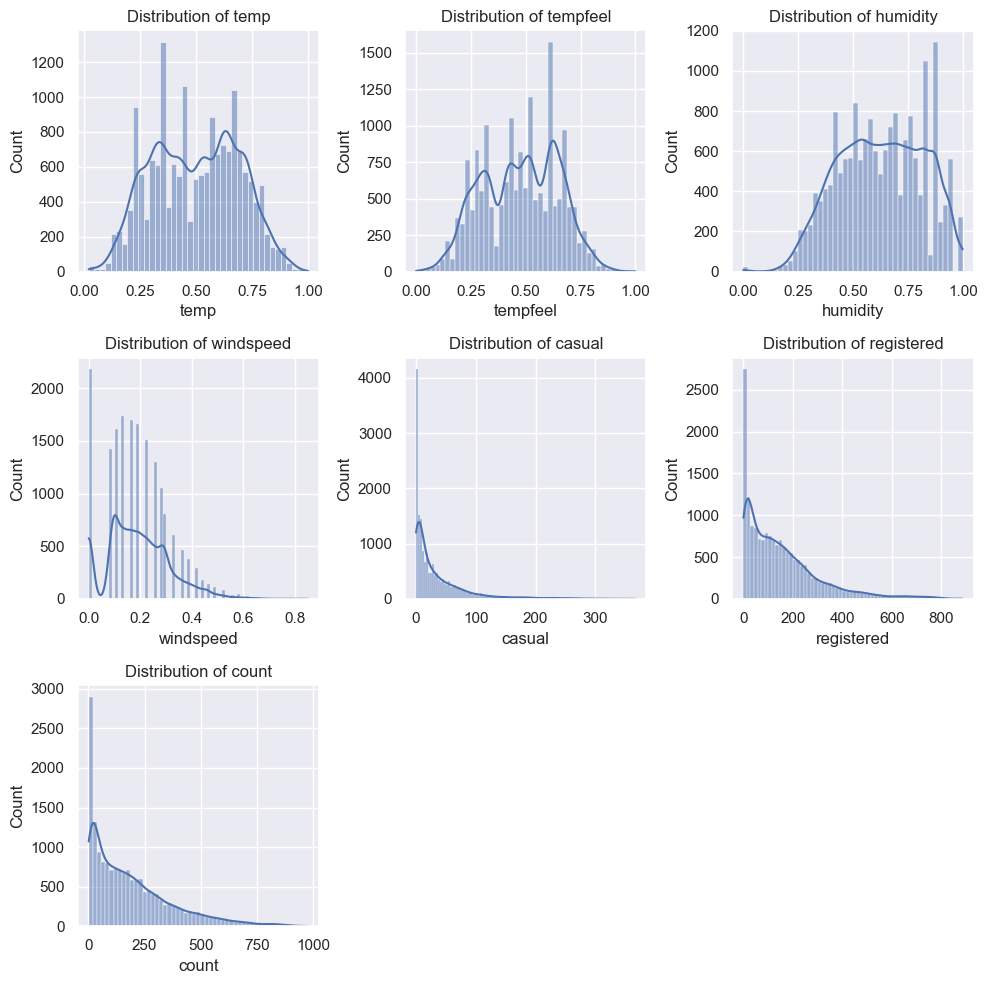

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualizations
plt.figure(figsize=(10, 10))

# Plot distributions of some key columns

for i, col in enumerate(continuous_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dfc[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Outliers
# After researching and study outliers we find those outliers are important for our model and research to avoid the overfitting
# Upon examination, we observed anomalies that were notably clustered within specific months of the year, coinciding with periods of hurricanes and storms in November ,feb , mars,july and Aug

temp


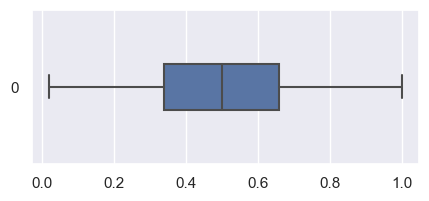

tempfeel


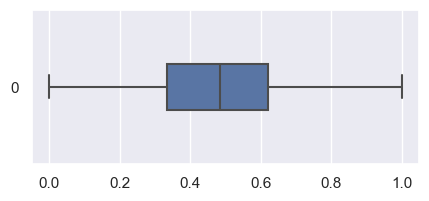

humidity


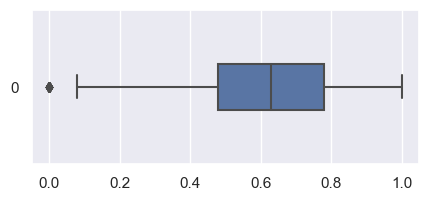

windspeed


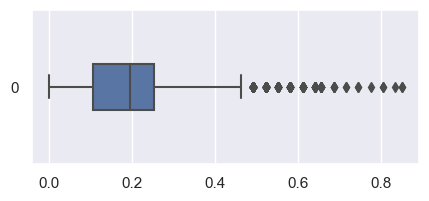

casual


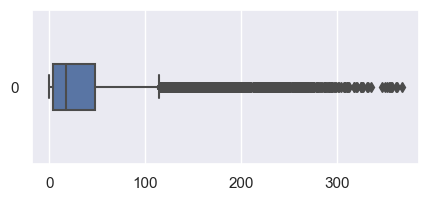

registered


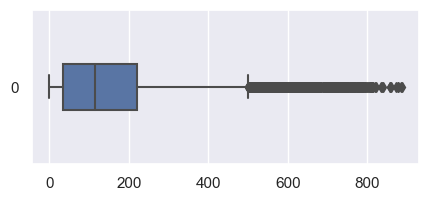

count


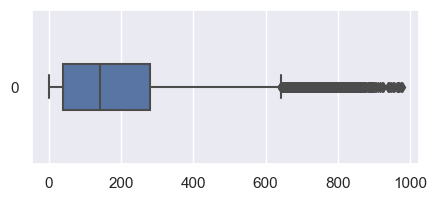

In [135]:

for col in continuous_cols:
    plt.figure(figsize=(5,2))
    print(col)
    sns.boxplot(dfc[col],orient="h",width=0.3)
    plt.show()

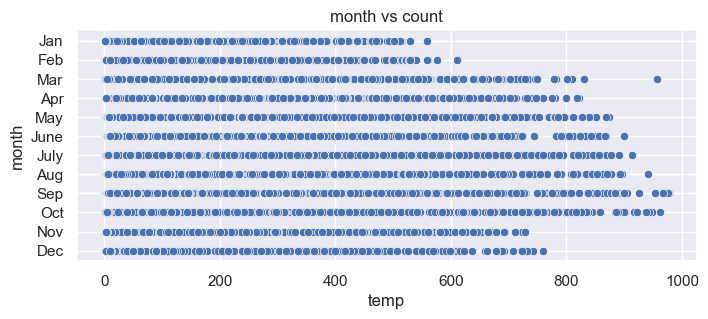

In [136]:
plt.figure(figsize=(8, 3))
sns.scatterplot(x='count', y='month', data=dfc)
plt.title('month vs count')
plt.xlabel('temp')
plt.ylabel('month')
plt.grid(True)
plt.show()

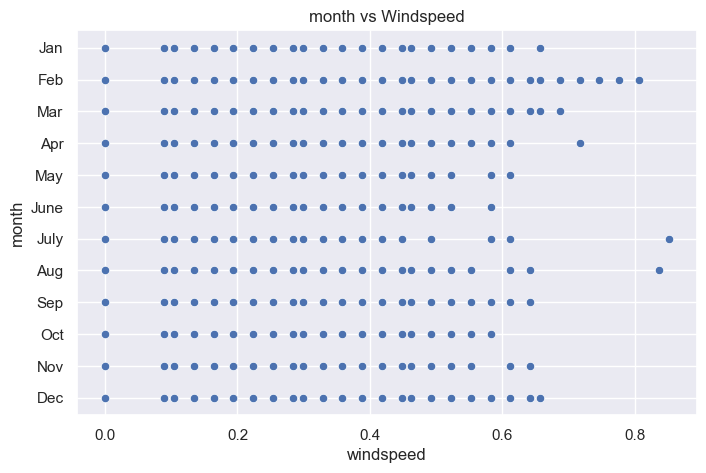

In [137]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='windspeed', y='month', data=dfc)
plt.title('month vs Windspeed')
plt.xlabel('windspeed')
plt.ylabel('month')
plt.grid(True)
plt.show()

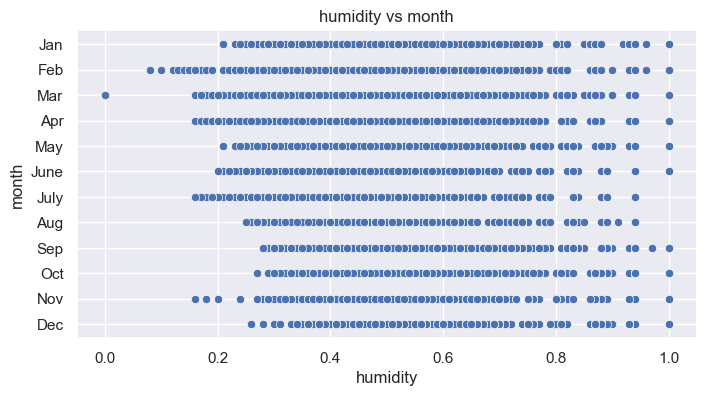

In [138]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='humidity', y='month', data=dfc)
plt.title('humidity vs month')
plt.xlabel('humidity')
plt.ylabel('month')
plt.grid(True)
plt.show()

# We identified outliers in the hum column where the humidity value is zero, which could indicate data entry errors or missing data

In [139]:

X = dfc['humidity']
X=pd.DataFrame(X)
Q1=X.humidity.quantile(0.25)
Q3=X.humidity.quantile(0.75)
IQR=Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3 +1.5*IQR
lower_limit,upper_limit
outliers = X[(X.humidity<lower_limit) | (X.humidity>upper_limit)]
i=outliers.index

d=dfc.loc[i]
d.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,tempfeel,humidity,windspeed,casual,registered,count
1551,spring,2011,Mar,0,No,thu,Yes,light,0.34,0.3182,0.0,0.2537,3,0,3
1552,spring,2011,Mar,1,No,thu,Yes,light,0.34,0.3182,0.0,0.2537,0,2,2
1553,spring,2011,Mar,2,No,thu,Yes,light,0.34,0.3182,0.0,0.2537,0,1,1
1554,spring,2011,Mar,5,No,thu,Yes,light,0.36,0.3485,0.0,0.1940,1,2,3
1555,spring,2011,Mar,6,No,thu,Yes,light,0.36,0.3333,0.0,0.3284,0,12,12


In [140]:
x=pd.DataFrame(i)
x= x.rename(columns={'0': 'outliers'})
x.columns = ['outliers']
x.count()

outliers    22
dtype: int64

In [141]:
# Create a new DataFrame excluding the outliers
dfc= dfc.drop(i)
dfc.reset_index(drop=True, inplace=True)
dfc

,season,year,month,hour,holiday,weekday,workingday,weather,temp,tempfeel,humidity,windspeed,casual,registered,count
0,spring,2011,Jan,0,No,sat,No,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,spring,2011,Jan,1,No,sat,No,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,spring,2011,Jan,2,No,sat,No,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,spring,2011,Jan,3,No,sat,No,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,spring,2011,Jan,4,No,sat,No,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17350,spring,2012,Dec,19,No,mon,Yes,mist,0.26,0.2576,0.60,0.1642,11,108,119
17351,spring,2012,Dec,20,No,mon,Yes,mist,0.26,0.2576,0.60,0.1642,8,81,89
17352,spring,2012,Dec,21,No,mon,Yes,clear,0.26,0.2576,0.60,0.1642,7,83,90
17353,spring,2012,Dec,22,No,mon,Yes,clear,0.26,0.2727,0.56,0.1343,13,48,61


In [142]:
# Create a new DataFrame excluding the outliers
dfc2= dfc2.drop(i)
dfc2.reset_index(drop=True, inplace=True)
dfc2

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17350,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17351,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17352,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17353,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


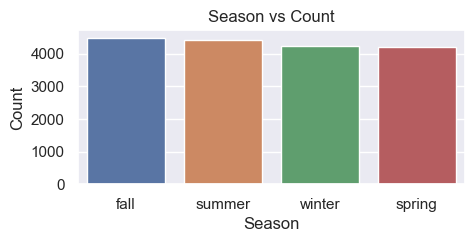

fall      4495
summer    4409
winter    4231
spring    4220
Name: season, dtype: int64


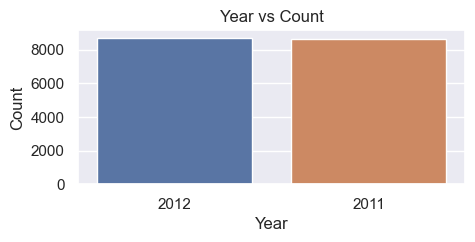

2012    8733
2011    8622
Name: year, dtype: int64


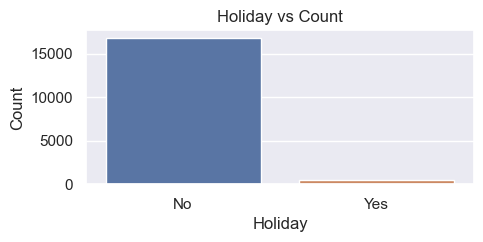

No     16855
Yes      500
Name: holiday, dtype: int64


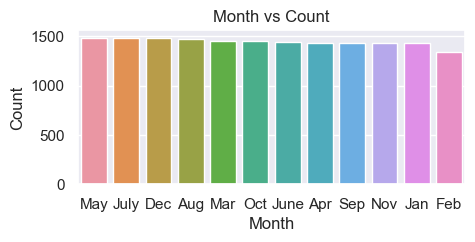

May     1488
July    1487
Dec     1482
Aug     1475
Mar     1451
Oct     1451
June    1440
Apr     1437
Sep     1437
Nov     1437
Jan     1429
Feb     1341
Name: month, dtype: int64


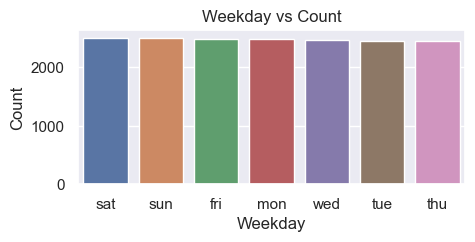

sat    2511
sun    2502
fri    2487
mon    2479
wed    2475
tue    2452
thu    2449
Name: weekday, dtype: int64


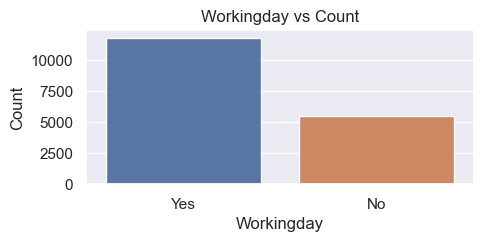

Yes    11842
No      5513
Name: workingday, dtype: int64


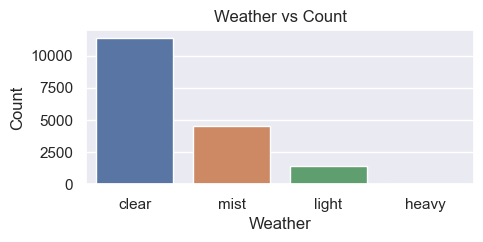

clear    11411
mist      4542
light     1399
heavy        3
Name: weather, dtype: int64


In [143]:


for col in categorical_cols:
    df_count = dfc[col].value_counts().reset_index()
    df_count.columns = [col, 'count']

    plt.figure(figsize=(5, 2))
    sns.barplot(x=col, y='count', data=df_count)
    plt.ylabel('Count')
    plt.xlabel(col.capitalize())
    plt.title(f'{col.capitalize()} vs Count')
    plt.show()
    print(dfc[col].value_counts())


# Does the usage of bikes vary across different hours of  seasons ? 
# When the rush hours for bike usage through the day ? 

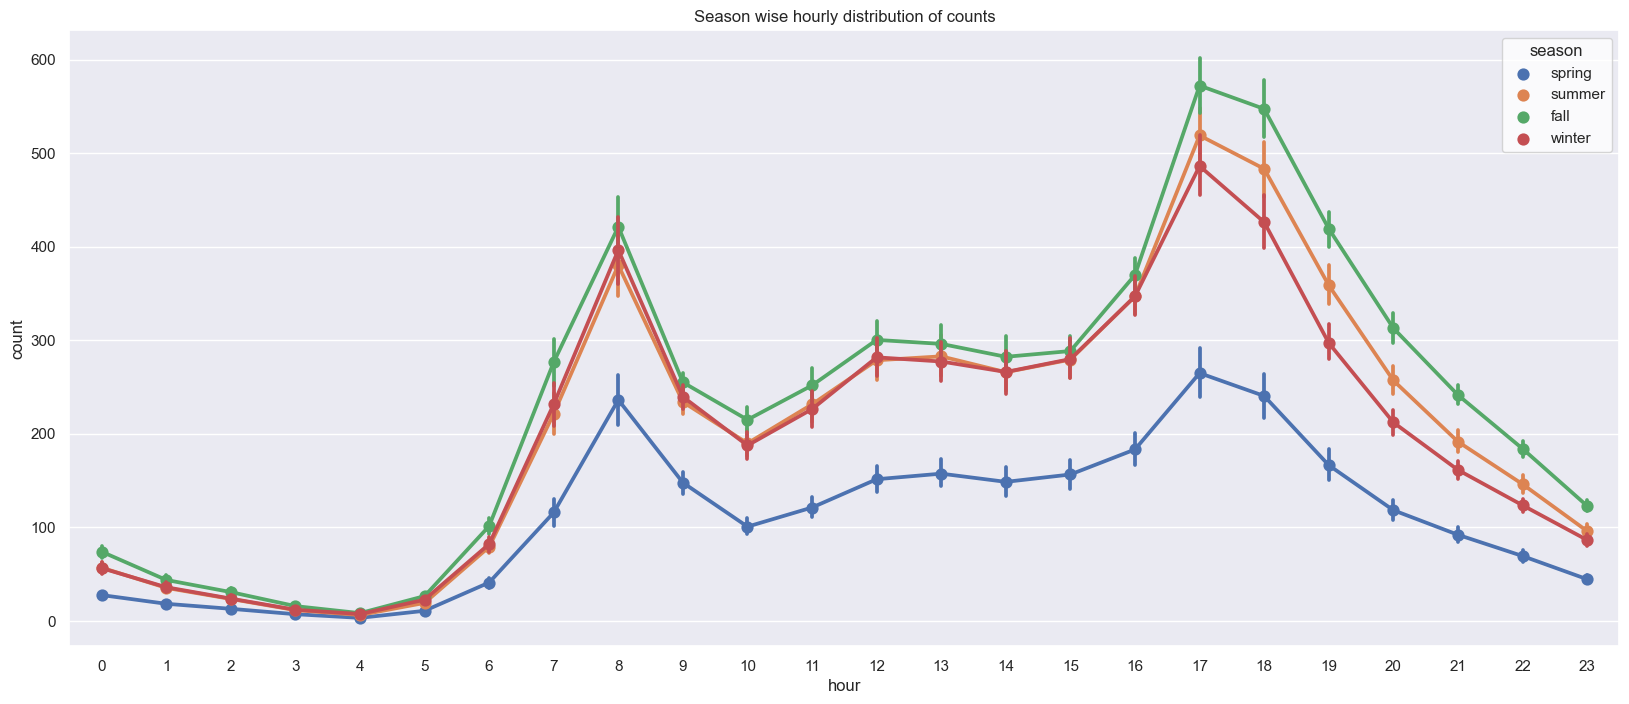

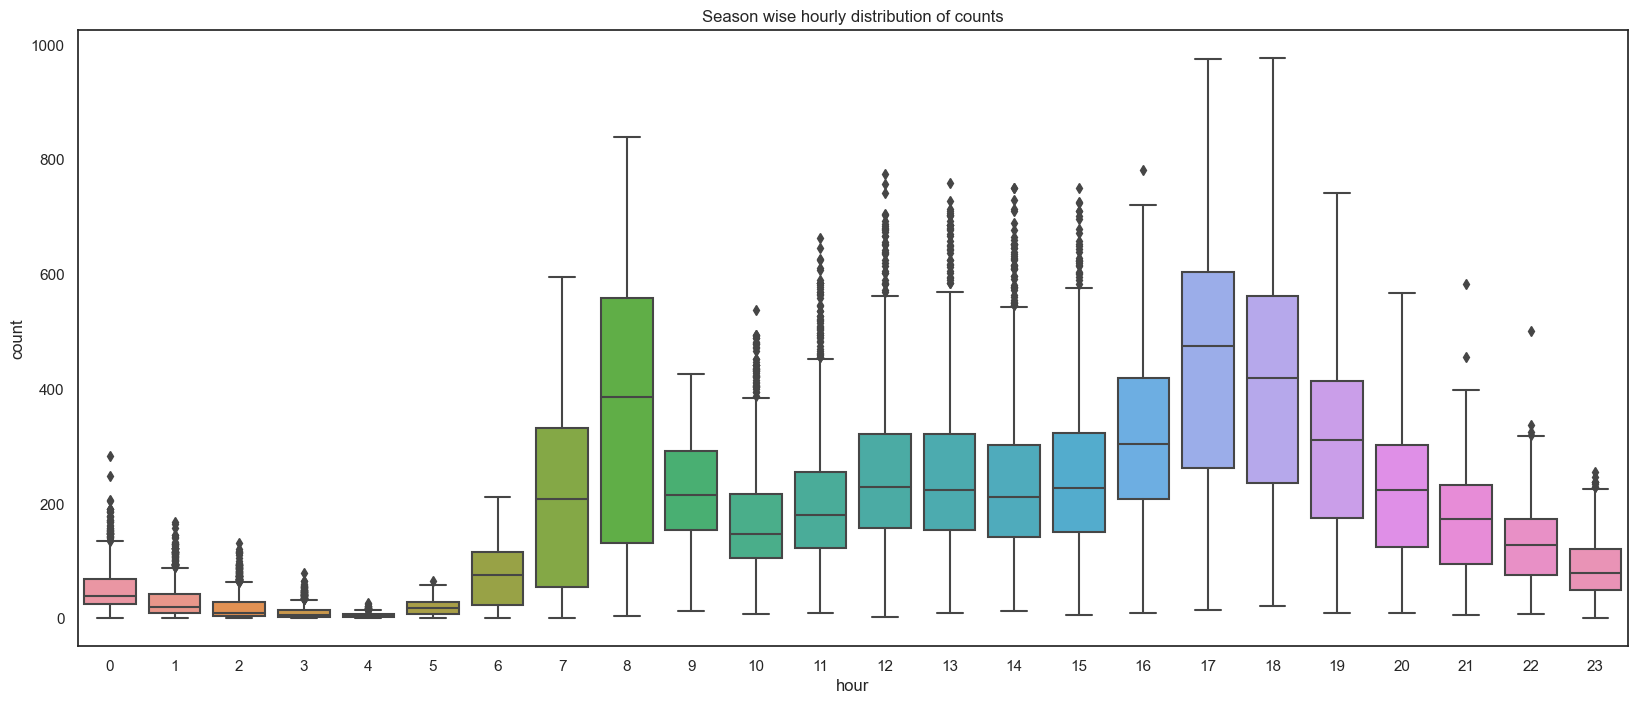

In [144]:

fig,ax=plt.subplots(figsize=(20,8))
sns.set_style('white')

sns.pointplot(x='hour',y='count',data=dfc[['hour','count','season']],hue='season',ax=ax)
ax.set_title('Season wise hourly distribution of counts')
plt.show()
fig,ax1=plt.subplots(figsize=(20,8))
sns.boxplot(x='hour',y='count',data=dfc[['hour','count']],ax=ax1)
ax1.set_title('Season wise hourly distribution of counts')
plt.show()

# By visualizing the weekday-wise hourly distribution of bike usage counts, can we discern any notable variations or trends in usage patterns throughout different hours of the day across weekdays?

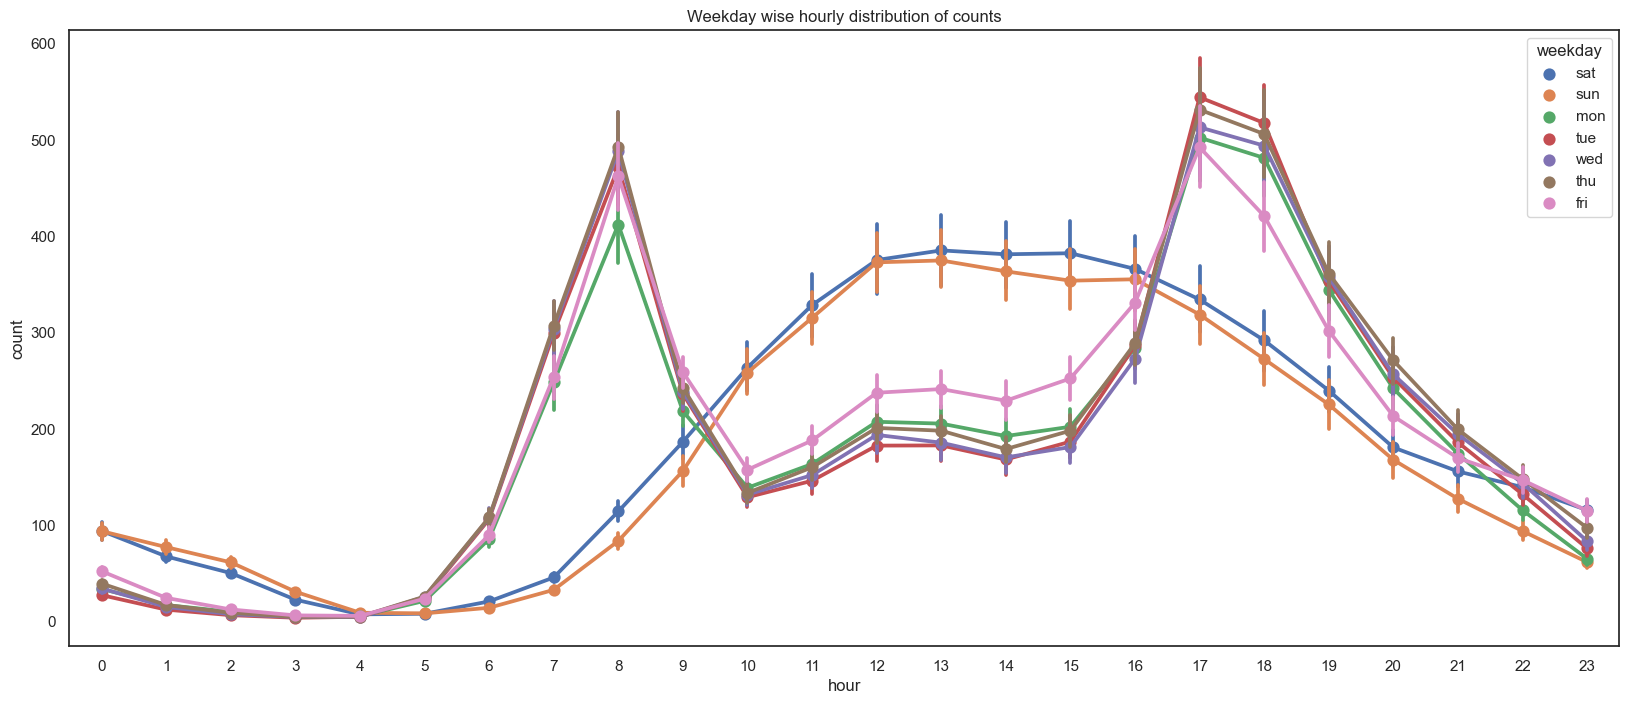

In [145]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(x='hour',y='count',data=dfc[['hour','count','weekday']],hue='weekday')
ax.set_title('Weekday wise hourly distribution of counts')
plt.show()

# In exploring the distribution of bike counts, can we identify any significant differences in usage patterns based on holidays versus non-holidays and working days versus non-working days,specifically when considering the impact of different seasons?"

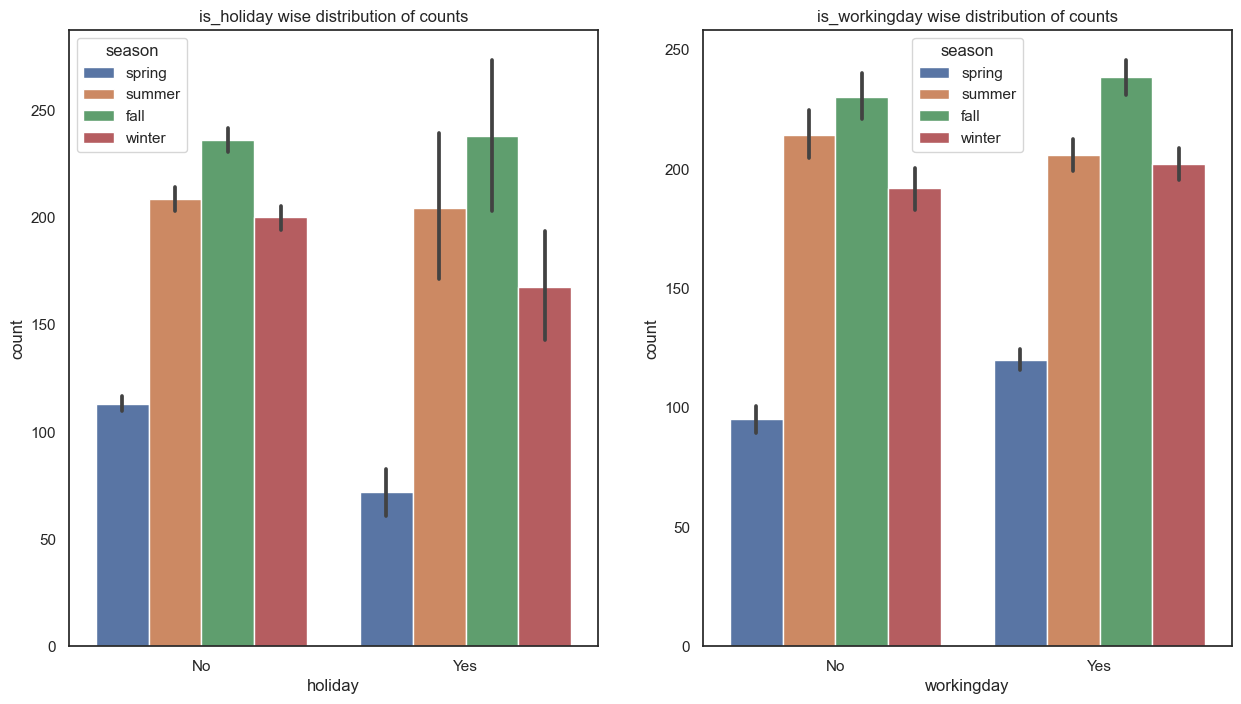

In [146]:

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,8))
sns.barplot(data=dfc,x='holiday',y='count',hue='season',ax=ax1)
ax1.set_title('is_holiday wise distribution of counts')
sns.barplot(data=dfc,x='workingday',y='count',hue='season',ax=ax2)
ax2.set_title('is_workingday wise distribution of counts')
plt.show()

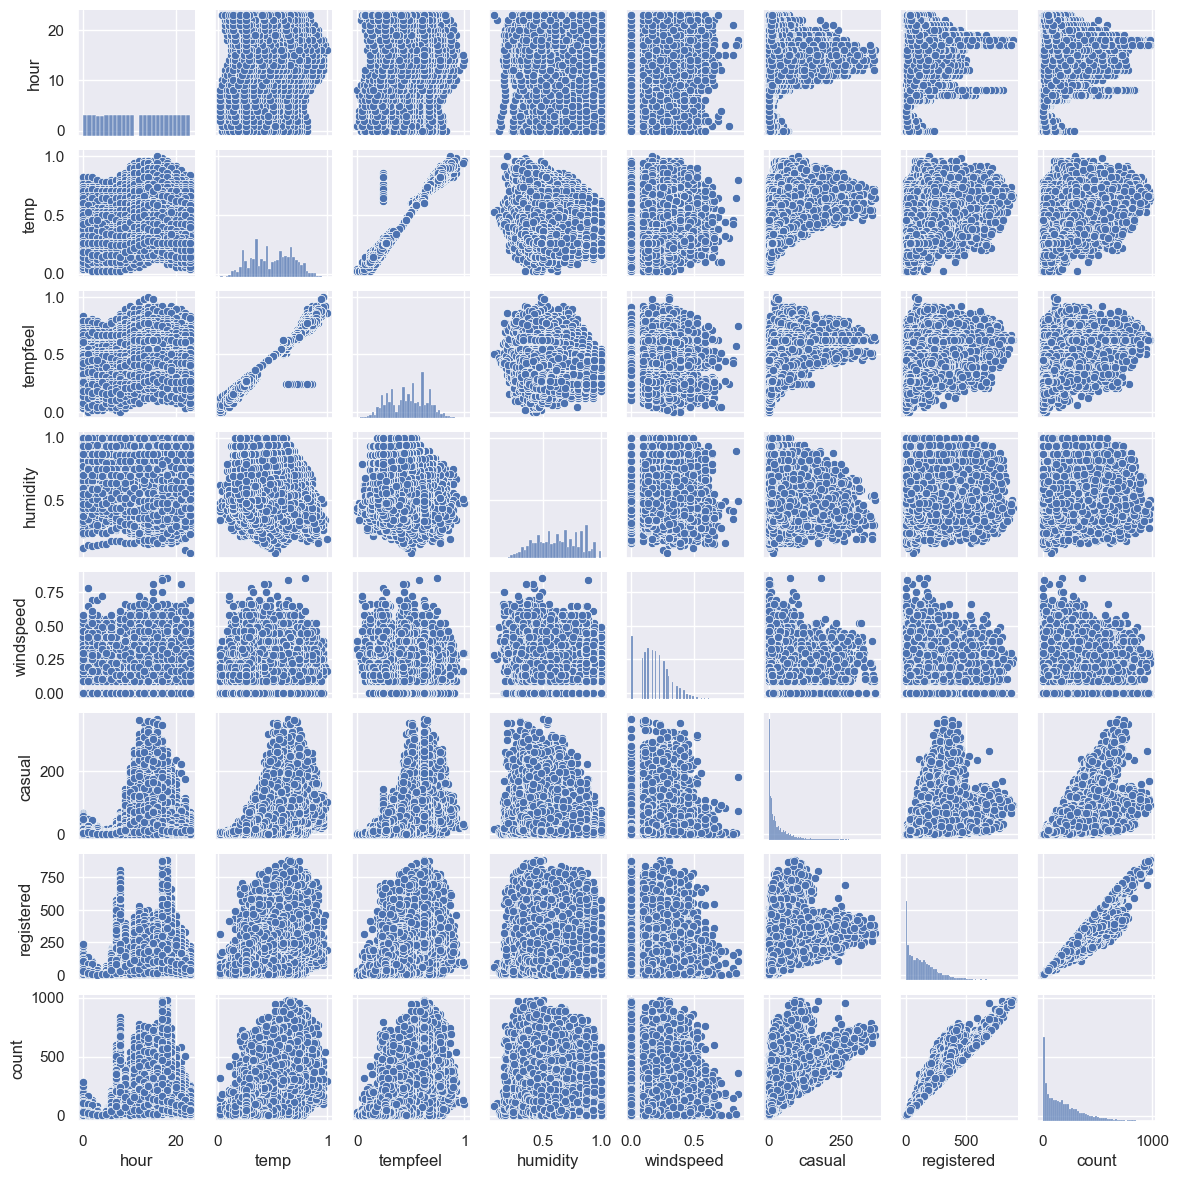

In [26]:
sns.set()

sns.pairplot(dfc, height = 1.5)
plt.show();

In [147]:
weight_temp = 41  # Weight for 'temp'
weight_atemp = 50  # Weight for 'atemp'

_temp=weight_temp * dfc['temp']

_atemp=weight_atemp * dfc['tempfeel']

dfc['perceived°C'] =(_temp+_atemp)/2

dfc= dfc.drop(columns = ['temp','tempfeel'])


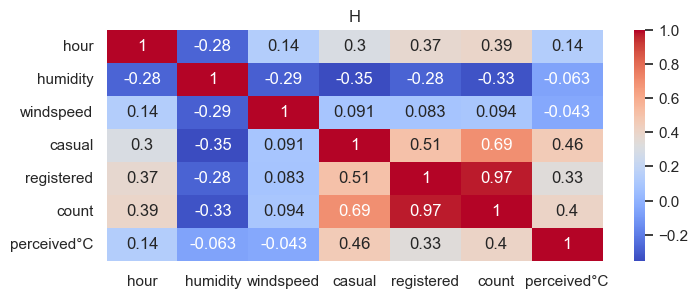

In [148]:
plt.figure(figsize=(8,3))
sns.heatmap(dfc.corr(), annot=True, cmap='coolwarm')
plt.title('H')
plt.show()

In [149]:
dfc= dfc.drop(columns = ['casual','registered'])

In [150]:
dfc2['perceived°C'] =(_temp+_atemp)/2
dfc2= dfc2.drop(columns = ['temp','atemp'])

dfc2= dfc2.drop(columns = ['casual','registered'])
dfc2= dfc2.drop(columns = ['cnt'])


In [151]:
dfc2.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,hum,windspeed,perceived°C
0,1,0,1,0,0,6,0,1,0.81,0.0,12.1175
1,1,0,1,1,0,6,0,1,0.80,0.0,11.3275
2,1,0,1,2,0,6,0,1,0.80,0.0,11.3275
3,1,0,1,3,0,6,0,1,0.75,0.0,12.1175
4,1,0,1,4,0,6,0,1,0.75,0.0,12.1175


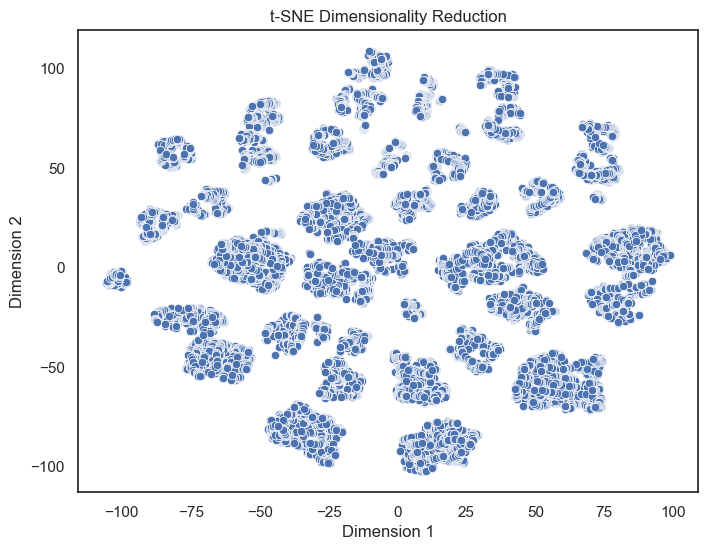

In [152]:
#– high intra-class similarity– low inter-class similarity
#Normlize the data to get high intra-class similarity– low inter-class similarity

scaler = MinMaxScaler()
features = scaler.fit_transform(dfc2)

tsne = TSNE(n_components=2, perplexity=50, learning_rate=10, n_iter=5000)
tsne_results = tsne.fit_transform(features)

# Creating a DataFrame with the t-SNE results
df_tsne = pd.DataFrame(data = tsne_results, columns = ['Dimension 1', 'Dimension 2'])

# Visualizing the data
plt.figure(figsize=(8,6))
sns.scatterplot(x="Dimension 1", y="Dimension 2", data=df_tsne)
plt.title('t-SNE Dimensionality Reduction')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

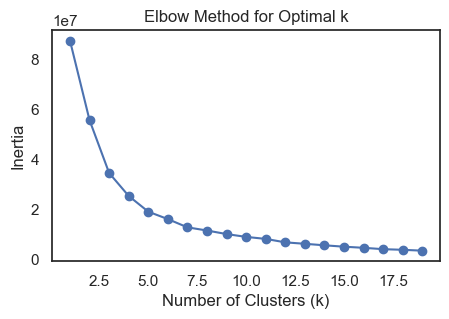

In [153]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 20):  # Testing k from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_tsne)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(range(1, 20), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


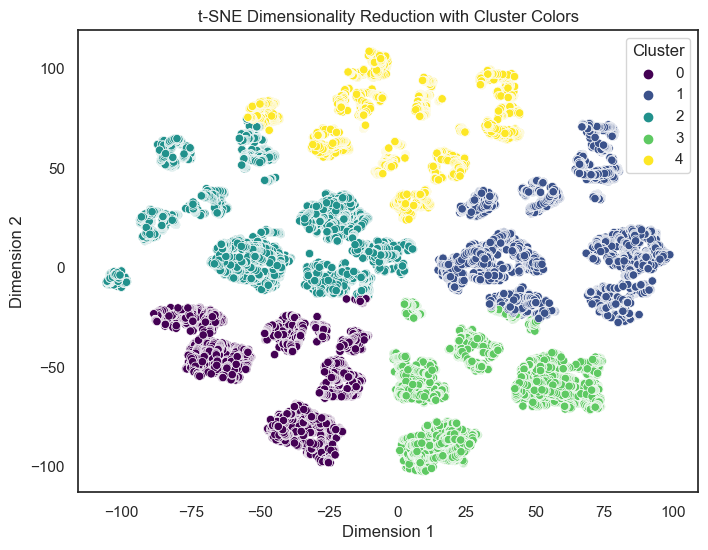

In [161]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters as needed
cluster_labels = kmeans.fit_predict(df_tsne)

# Add cluster labels to the DataFrame
df_tsne['Cluster'] = cluster_labels

# Visualize with colors for clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x="Dimension 1", y="Dimension 2", hue="Cluster", palette='viridis', data=df_tsne)
plt.title('t-SNE Dimensionality Reduction with Cluster Colors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster', loc='best')
plt.show()

In [166]:
dfc

,season,year,month,hour,holiday,weekday,workingday,weather,humidity,windspeed,count,perceived°C
0,spring,2011,Jan,0,No,sat,No,clear,0.81,0.0000,16,12.1175
1,spring,2011,Jan,1,No,sat,No,clear,0.80,0.0000,40,11.3275
2,spring,2011,Jan,2,No,sat,No,clear,0.80,0.0000,32,11.3275
3,spring,2011,Jan,3,No,sat,No,clear,0.75,0.0000,13,12.1175
4,spring,2011,Jan,4,No,sat,No,clear,0.75,0.0000,1,12.1175
...,...,...,...,...,...,...,...,...,...,...,...,...
17350,spring,2012,Dec,19,No,mon,Yes,mist,0.60,0.1642,119,11.7700
17351,spring,2012,Dec,20,No,mon,Yes,mist,0.60,0.1642,89,11.7700
17352,spring,2012,Dec,21,No,mon,Yes,clear,0.60,0.1642,90,11.7700
17353,spring,2012,Dec,22,No,mon,Yes,clear,0.56,0.1343,61,12.1475


# Building the Model 


In [206]:
categorical_cols=["hour",'season','year','holiday','month','weekday','workingday','weather']
dfc_1HC2=pd.get_dummies(dfc,columns=categorical_cols)
dfc_1HC2.head()


,humidity,windspeed,count,perceived°C,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,...,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_No,workingday_Yes,weather_clear,weather_heavy,weather_light,weather_mist
0,0.81,0.0,16,12.1175,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0.80,0.0,40,11.3275,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0.80,0.0,32,11.3275,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0.75,0.0,13,12.1175,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0.75,0.0,1,12.1175,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [207]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

num_vars = ['perceived°C','humidity','windspeed','count']
scaler = StandardScaler()
dfc_1HC2[num_vars] = scaler.fit_transform(dfc_1HC2[num_vars])
df_train, df_test = train_test_split(dfc_1HC2, train_size = 0.6, test_size = 0.4, random_state = 100)



In [208]:
X_train = df_train
y_train = df_train.pop('count')

X_test = df_test
y_test = df_test.pop('count')


In [239]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
models = {
    'LR': LinearRegression(),
    'K-NN': KNeighborsRegressor(),
    'RF': RandomForestRegressor()
}
models_name = list(models.keys())
mse_values = list()

In [240]:
for name, model in models.items():
    print(f'Model name: {name}')
    model.fit(X_train, y_train)
    print(f'Training Score: {model.score(X_train, y_train)}')
    print(f'Testing Score : {model.score(X_test, y_test)}')
    y_pred = model.predict(X_test)
    print(f'MSE: {(mean_squared_error(y_test, y_pred))}')
    mse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    print('-' * 40)

Model name: LR
Training Score: 0.6880147922755594
Testing Score : 0.6822197296983503
MSE: 0.3129879924387219
----------------------------------------
Model name: K-NN
Training Score: 0.7320006805593904
Testing Score : 0.5987903332389588
MSE: 0.3951592338547237
----------------------------------------
Model name: RF
Training Score: 0.9874583454614643
Testing Score : 0.9150492183472317
MSE: 0.08366968339589242
----------------------------------------


# Feature Selection

In [209]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [210]:
X_tra = X_tra.to_numpy()
X_val = X_val.to_numpy()
y_tra = y_tra.to_numpy()
y_val = y_val.to_numpy()


In [223]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test= X_test.to_numpy()
y_test= y_test.to_numpy()


In [219]:
def find_feature_index_which_gives_smallest_validation_error_if_removed(X_tr,
                                                                        y_tr,                                                            
                                                                        X_va,
                                                                        y_va,
                                                                        feature_index_list,
                                                                        k_neighb=13,
                                                                        ml_algo_type='linear'):
    if ml_algo_type == 'linear':
        ml_regression_model = LinearRegression()
    elif ml_algo_type == 'knn':
        ml_regression_model = KNeighborsRegressor(n_neighbors=k_neighb)
    elif ml_algo_type == 'RF':
        ml_regression_model = RandomForestRegressor()
    elif ml_algo_type == 'SVR':
        ml_regression_model = SVR()
    else:
        print("Invalid ML algorithm type (should be either linear or knn)")
        return -1, -1 
    
    rsquareds = {}
    for feature_index in feature_index_list:
        feature_index_list_minus_feat_index = feature_index_list.copy()
        feature_index_list_minus_feat_index.remove(feature_index)
        rsquareds[feature_index] = ml_regression_model.fit(X_tr[:,feature_index_list_minus_feat_index], y_tr).score(X_va[:, feature_index_list_minus_feat_index], y_va)
            
    return max(rsquareds, key=rsquareds.get), rsquareds[max(rsquareds, key=rsquareds.get)]


In [212]:

# Initialize feature index list with all features
feature_indices = list(range(X_train.shape[1]))

# Perform backward selection
selected_features = feature_indices.copy()  # Initialize selected features with all features

while len(selected_features) > 1:
    # Find the feature index that gives the smallest increase in validation error when removed
    best_feature, best_r_squared = find_feature_index_which_gives_smallest_validation_error_if_removed(
        X_tra, y_tra, X_val, y_val, selected_features, ml_algo_type='linear')
    
    # Remove the best feature from the selected feature list
    selected_features.remove(best_feature)
    
    # Print the results or take other actions as needed
    print("Removed feature index:", best_feature)
    print("Validation R-squared after feature removal:", best_r_squared)
    print("Remaining features:", selected_features)
    print("--------------------------------------------")


Removed feature index: 56
Validation R-squared after feature removal: 0.6794070055994933
Remaining features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59]
--------------------------------------------
Removed feature index: 11
Validation R-squared after feature removal: 0.6799501849636089
Remaining features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59]
--------------------------------------------
Removed feature index: 29
Validation R-squared after feature removal: 0.6802294422302002
Remaining features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37

Removed feature index: 59
Validation R-squared after feature removal: 0.6783694845464608
Remaining features: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 30, 32, 33, 37, 38, 39, 40, 44, 50, 58]
--------------------------------------------
Removed feature index: 37
Validation R-squared after feature removal: 0.6774457057576319
Remaining features: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 30, 32, 33, 38, 39, 40, 44, 50, 58]
--------------------------------------------
Removed feature index: 50
Validation R-squared after feature removal: 0.6764851003962632
Remaining features: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 30, 32, 33, 38, 39, 40, 44, 58]
--------------------------------------------
Removed feature index: 39
Validation R-squared after feature removal: 0.6754875298132259
Remaining features: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 1

In [224]:
# Best Validation R-squared after feature removal: 0.6805135468872994

Remaining_features1=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 
20, 22, 23, 24, 25, 26, 27, 30, 32, 33, 37, 38, 39, 40, 41, 43, 44, 45, 46, 48, 50, 58, 59]

X_remaining_train = X_train[:, Remaining_features1] 
X_remaining_test=X_test[:, Remaining_features1] 

In [225]:
model_lin_regr = LinearRegression()
model_lin_regr = model_lin_regr.fit(X_remaining_train, y_train)

# two model prediction for regression problem 
predictions_linreg_test = model_lin_regr.predict(X_remaining_test)


R2_linreg_train= model_lin_regr.score(X_remaining_train, y_train)
R2_linreg_test = model_lin_regr.score(X_remaining_test, y_test)
print("Accuracy (empirical) of the LR algorithm after training is",R2_linreg_train )
print("Accuracy (generalization) of the LR algorithm after testing is ",R2_linreg_test)


Accuracy (empirical) of the LR algorithm after training is 0.685768782774848
Accuracy (generalization) of the LR algorithm after training is  0.6810290413300535


In [214]:
# Initialize feature index list with all features
feature_indices = list(range(X_train.shape[1]))

# Perform backward selection
selected_features = feature_indices.copy()  # Initialize selected features with all features

while len(selected_features) > 1:
    # Find the feature index that gives the smallest increase in validation error when removed
    best_feature, best_r_squared = find_feature_index_which_gives_smallest_validation_error_if_removed(
        X_tra, y_tra, X_val, y_val, selected_features, ml_algo_type='knn')
    
    # Remove the best feature from the selected feature list
    selected_features.remove(best_feature)
    
    # Print the results or take other actions as needed
    print("Removed feature index:", best_feature)
    print("Validation R-squared after feature removal:", best_r_squared)
    print("Remaining features:", selected_features)
    print("--------------------------------------------")


Removed feature index: 1
Validation R-squared after feature removal: 0.5802478137047835
Remaining features: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
--------------------------------------------
Removed feature index: 48
Validation R-squared after feature removal: 0.6045009491041203
Remaining features: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
--------------------------------------------
Removed feature index: 32
Validation R-squared after feature removal: 0.6267772516451484
Remaining features: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 

Removed feature index: 23
Validation R-squared after feature removal: 0.9088010022875764
Remaining features: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, 31, 34, 43, 44, 47, 50, 54, 55, 58]
--------------------------------------------
Removed feature index: 43
Validation R-squared after feature removal: 0.9087640250648445
Remaining features: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, 31, 34, 44, 47, 50, 54, 55, 58]
--------------------------------------------
Removed feature index: 44
Validation R-squared after feature removal: 0.9077066340687429
Remaining features: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, 31, 34, 47, 50, 54, 55, 58]
--------------------------------------------
Removed feature index: 50
Validation R-squared after feature removal: 0.9065958711902191
Remaining features: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1

In [228]:
# Best Validation R-squared after feature removal: 0.9134221294592935
Remaining_features1=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16
, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 31, 34, 37, 39, 43, 44, 47, 50, 54, 55, 58]

X_remaining_train = X_train[:, Remaining_features1] 
X_remaining_test=X_test[:, Remaining_features1] 

In [229]:
model_knn = KNeighborsRegressor(n_neighbors=13)
model_knn.fit(X_remaining_train, y_train)

predictions_knn_test = model_knn.predict(X_remaining_test)

R2_knn_train = model_knn.score(X_remaining_train, y_train)
R2_knn_test = model_knn.score(X_remaining_test, y_test)
print("Accuracy (empirical) of the k-NN algorithm after training is ",R2_knn_train)
print("Accuracy (generalization) of the k-NN algorithm after training is ",R2_knn_test )

Accuracy (empirical) of the k-NN algorithm after training is  0.9258214680779443
Accuracy (generalization) of the k-NN algorithm after training is  0.9023661192393552


In [218]:
# Initialize feature index list with all features
feature_indices = list(range(X_train.shape[1]))

# Perform backward selection
selected_features = feature_indices.copy()  # Initialize selected features with all features

while len(selected_features) > 1:
    # Find the feature index that gives the smallest increase in validation error when removed
    best_feature, best_r_squared = find_feature_index_which_gives_smallest_validation_error_if_removed(
        X_tra, y_tra, X_val, y_val, selected_features, ml_algo_type='RF')
    
    # Remove the best feature from the selected feature list
    selected_features.remove(best_feature)
    
    # Print the results or take other actions as needed
    print("Removed feature index:", best_feature)
    print("Validation R-squared after feature removal:", best_r_squared)
    print("Remaining features:", selected_features)
    print("--------------------------------------------")


Removed feature index: 0
Validation R-squared after feature removal: 0.9104357330033606
Remaining features: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
--------------------------------------------
Removed feature index: 1
Validation R-squared after feature removal: 0.911620481710916
Remaining features: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
--------------------------------------------
Removed feature index: 49
Validation R-squared after feature removal: 0.9136149772527198
Remaining features: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 

Removed feature index: 16
Validation R-squared after feature removal: 0.9129500463200385
Remaining features: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 31, 37, 43, 45, 47, 48, 50, 51, 54, 56, 58]
--------------------------------------------
Removed feature index: 50
Validation R-squared after feature removal: 0.9119451304469067
Remaining features: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 31, 37, 43, 45, 47, 48, 51, 54, 56, 58]
--------------------------------------------
Removed feature index: 43
Validation R-squared after feature removal: 0.9100625157924465
Remaining features: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 31, 37, 45, 47, 48, 51, 54, 56, 58]
--------------------------------------------
Removed feature index: 45
Validation R-squared after feature removal: 0.908910482626872
Remaining features: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19, 20, 21

In [234]:
#Best Validation R-squared after feature removal: 0.9162726282013292
Remaining_features1 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 36, 37, 40, 41, 42, 43, 44, 45, 47, 48, 50, 51, 52, 54, 55, 56, 58]
X_remaining_train = X_train[:, Remaining_features1] 
X_remaining_test=X_test[:, Remaining_features1] 

In [236]:
rf= RandomForestRegressor()
rf.fit(X_remaining_train, y_train)

predictions_rf_test = rf.predict(X_remaining_test)

R2_rf_train = rf.score(X_remaining_train, y_train)
R2_rf_test = rf.score(X_remaining_test, y_test)
print("Accuracy (empirical) of the RF algorithm after training is ",R2_knn_train)
print("Accuracy (generalization) of the RF algorithm after testing is ",R2_knn_test )

Accuracy (empirical) of the RF algorithm after training is  0.9892996483622526
Accuracy (generalization) of the RF algorithm after testing is  0.9242206342374947


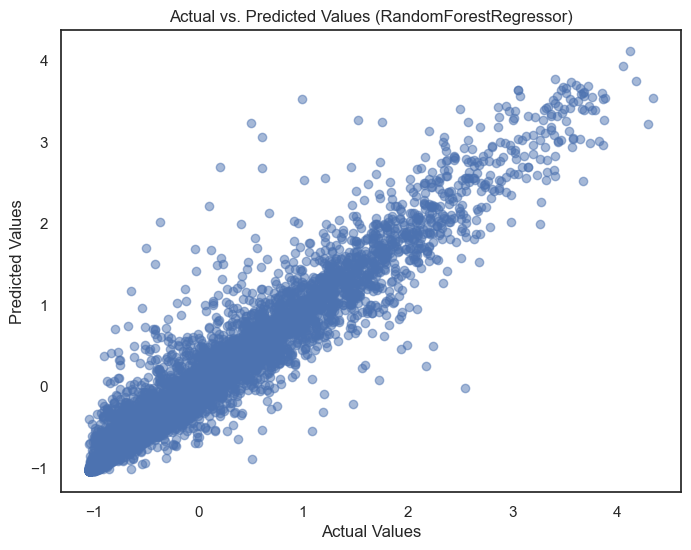

In [237]:
# Plotting actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_rf_test, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (RandomForestRegressor)')
plt.show()

In [238]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_rf_test})
results

,Actual,Predicted
0,-0.588125,-0.542977
1,0.315934,0.415436
2,0.464773,0.230683
3,1.357807,1.258306
4,0.067869,0.389251
...,...,...
6937,0.354522,-0.310733
6938,2.074439,1.645783
6939,0.635663,0.649940
6940,-0.191221,-0.154672
